In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
!pip install qulacs
!pip install qulacsvis
!pip install matplotlib
!pip install numpy
!pip install scipy

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
import random
import math
import scipy.optimize
from scipy import stats
from scipy.integrate import quad
from qulacs import QuantumState, Observable, QuantumCircuit
from qulacsvis import circuit_drawer
from qulacs.circuit import QuantumCircuitOptimizer
from qulacs.state import inner_product
from qulacs.gate import Identity, X,Y,Z
from qulacs.gate import H,S,Sdag,T,Tdag,sqrtX,sqrtXdag,sqrtY,sqrtYdag
from qulacs.gate import RX,RY,RZ,CNOT, CZ, SWAP
from qulacs.gate import to_matrix_gate,RandomUnitary,DenseMatrix,merge



In [5]:
import circuit_shots as cs

In [6]:
import generator as gen

# trotter_Ising_circuit_drawer(t,δ,λ,nqubits,circuit)

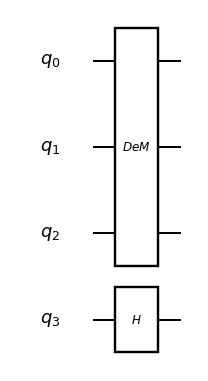

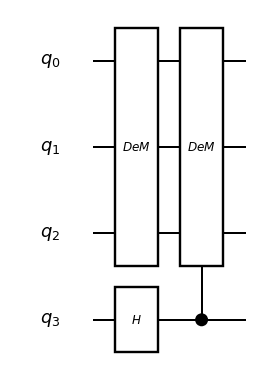

In [6]:
nqubits = 4
circuit_practice_1 = QuantumCircuit(nqubits)
circuit_practice_1.add_H_gate(nqubits-1)
target_list = [i for i in range(nqubits-1)]
random_unitary_gate = RandomUnitary(target_list)
circuit_practice_1.add_gate(random_unitary_gate)
circuit_drawer(circuit_practice_1,"mpl")

t = 1.0
δ = 0.1
λ = 1.0
cs.trotter_Ising_circuit_drawer(t,δ,λ,nqubits,circuit_practice_1)
circuit_drawer(circuit_practice_1,"mpl")

# observable_circuit_drawer(δ,λ,nqubits,circuit,sampled_Obs)

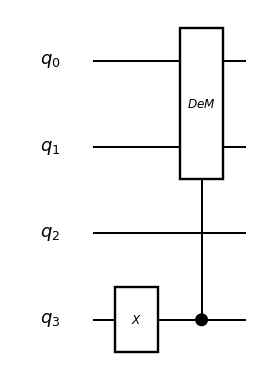

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
0b1000


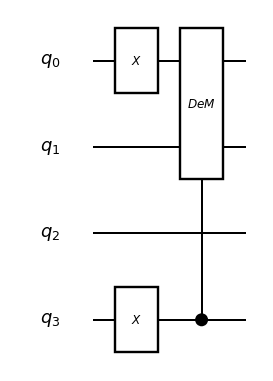

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
0b1001


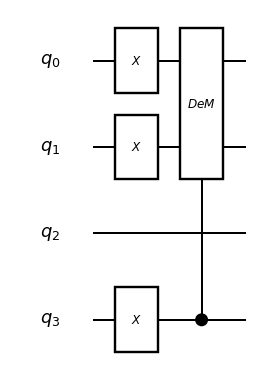

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
0b1011


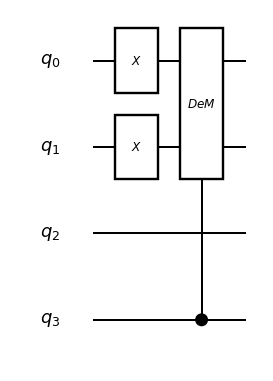

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
0b11


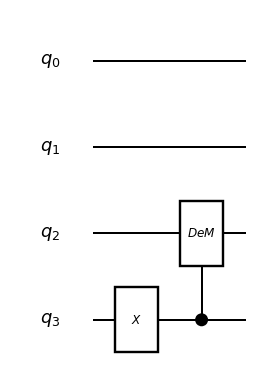

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
0b1100


In [16]:
"""
    Check if the function "observable_circuit_drawer" is working correctly.
"""
δ = 0.1
λ = 1.0
nqubits = 4
circuit = QuantumCircuit(nqubits)
circuit.add_X_gate(nqubits-1)
sampled_Obs = [3, 0, -1] # [gate,index,coefficient] => Z_0Z_1
cs.observable_circuit_drawer(δ,λ,nqubits,circuit,sampled_Obs)
circuit_drawer(circuit,"mpl")

state = QuantumState(nqubits)
state.set_zero_state()
circuit.update_quantum_state(state)
res_sampling = state.sampling(10)
print(res_sampling)
print(bin(res_sampling[0]))



δ = 0.1
λ = 1.0
nqubits = 4
circuit = QuantumCircuit(nqubits)
circuit.add_X_gate(nqubits-1)
circuit.add_X_gate(0)
sampled_Obs = [3, 0, -1] # [gate,index,coefficient] => Z_0Z_1
cs.observable_circuit_drawer(δ,λ,nqubits,circuit,sampled_Obs)
circuit_drawer(circuit,"mpl")

state = QuantumState(nqubits)
state.set_zero_state()
circuit.update_quantum_state(state)
res_sampling = state.sampling(10)
print(res_sampling)
print(bin(res_sampling[0]))



δ = 0.1
λ = 1.0
nqubits = 4
circuit = QuantumCircuit(nqubits)
circuit.add_X_gate(nqubits-1)
circuit.add_X_gate(0)
circuit.add_X_gate(1)
sampled_Obs = [3, 0, -1] # [gate,index,coefficient] => Z_0Z_1
cs.observable_circuit_drawer(δ,λ,nqubits,circuit,sampled_Obs)
circuit_drawer(circuit,"mpl")

state = QuantumState(nqubits)
state.set_zero_state()
circuit.update_quantum_state(state)
res_sampling = state.sampling(10)
print(res_sampling)
print(bin(res_sampling[0]))



δ = 0.1
λ = 1.0
nqubits = 4
circuit = QuantumCircuit(nqubits)
circuit.add_X_gate(0)
circuit.add_X_gate(1)
sampled_Obs = [3, 0, -1] # [gate,index,coefficient] => Z_0Z_1
cs.observable_circuit_drawer(δ,λ,nqubits,circuit,sampled_Obs)
circuit_drawer(circuit,"mpl")

state = QuantumState(nqubits)
state.set_zero_state()
circuit.update_quantum_state(state)
res_sampling = state.sampling(10)
print(res_sampling)
print(bin(res_sampling[0]))



δ = 0.1
λ = 1.0
nqubits = 4
circuit = QuantumCircuit(nqubits)
circuit.add_X_gate(nqubits-1)
sampled_Obs = [1, 2, -1] # [gate,index,coefficient] => X_0
cs.observable_circuit_drawer(δ,λ,nqubits,circuit,sampled_Obs)
circuit_drawer(circuit,"mpl")

state = QuantumState(nqubits)
state.set_zero_state()
circuit.update_quantum_state(state)
res_sampling = state.sampling(10)
print(res_sampling)
print(bin(res_sampling[0]))


In [286]:
"""
    Check the function of "merge".
"""
nqubits = 2
state = QuantumState(nqubits)
state.set_zero_state()
a = Identity(0)
b = X(1)
c = merge(a,b)
c.update_quantum_state(state)
print(bin(state.sampling(1)[0]))


nqubits = 2
state = QuantumState(nqubits)
state.set_zero_state()
a = Identity(0)
b = X(1)
c = merge(a,b)
d = X(0)
e = merge(c,d)
e.update_quantum_state(state)
print(bin(state.sampling(1)[0]))


0b10
0b11


# $\langle \bar{H}\rangle$の実装

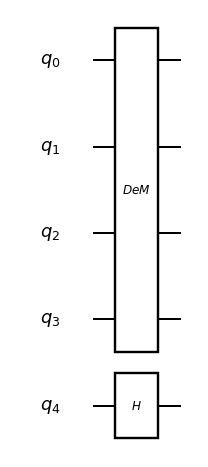

In [8]:
# number of qubits without an ancillary qubit.
n_qubits = 4
# number of all qubits.
nqubits = n_qubits + 1 #  nqubits => _ext
state_original = QuantumState(nqubits)
state_original.set_zero_state()

# trotter stride
δ = 0.1
# parameter
λ = 1.2
E_0 = 0
β=0.01
τ=100
# number of random sampling (t,t')
Ns = 10**4
# number of circuit shots
Ms = 10**5
# range of (t,t')
tmax = 0.5
tmin = -1*tmax
# coefficients
coef_1 = -1*(2-λ)
# print(coef_1)
coef_2 = -1*λ
# print(coef_2)

# prepare obs_list_total [[3, 1, coef_1], ..., [1, 1, coef_2]] and prob_list_total [coef_1/aO, ..., coef_2/aO]
aO = gen.calculate_aO(nqubits, coef_1, coef_2)
obs_list_total, prob_list_total = gen.prepare_sample_target(nqubits, coef_1, coef_2, aO)

# prepare initial state (U_i tensor H)(|Ψ> tensor |0>)
circuit_trotter_Ising_original = QuantumCircuit(nqubits)
circuit_trotter_Ising_original.add_H_gate(nqubits-1)
target_list = [i for i in range(nqubits-1)] ####### numpyでも良い？
random_unitary_gate = RandomUnitary(target_list)
circuit_trotter_Ising_original.add_gate(random_unitary_gate)

circuit_drawer(circuit_trotter_Ising_original,"mpl")



## X測定

In [9]:
# time measure
t_start = dt.datetime.now()

res_X_sampling = np.array([])
count_Ns = 0
for i in range(Ns):
    count_Ns += 1
    t_1 = gen.sampling(tmin, tmax, β, τ)
    t_2 = gen.sampling(tmin, tmax, β, τ)
    sampled_Obs_list = gen.select_obs_Ising(nqubits, coef_1, coef_2, aO, obs_list_total, prob_list_total)
    #### print(sampled_Obs_list)
    # prepare trotter part
    circuit_trotter_Ising_original_copy = circuit_trotter_Ising_original.copy()
    cs.trotter_Ising_circuit_drawer(t_1, δ, λ, nqubits, circuit_trotter_Ising_original_copy)
    circuit_trotter_Ising_original_copy.add_X_gate(nqubits-1)
    cs.trotter_Ising_circuit_drawer(t_2, δ, λ, nqubits, circuit_trotter_Ising_original_copy)
    circuit_trotter_Ising_original_copy.add_X_gate(nqubits-1)

    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")

    state = state_original.copy()
    cs.observable_circuit_drawer(δ, λ, nqubits, circuit_trotter_Ising_original_copy, sampled_Obs_list)
    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")

    # change basis to measure
    circuit_trotter_Ising_original_copy.add_H_gate(nqubits-1)

    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")


    circuit_trotter_Ising_original_copy.update_quantum_state(state)
    samples = state.sampling(Ms) # [2, 5, 12, 98]
    estimated_X = 0
    mask = int("1" + "0"*(nqubits-1),2)
    for s in samples:
        bitcount = bin(s & mask).count("1")
        estimated_X += np.sign(sampled_Obs_list[2])*np.exp(E_0*(t_1-t_2)) * (-1)**bitcount /Ms

    circuit_trotter_Ising_original_copy.add_H_gate(nqubits-1)
    res_X_sampling = np.append(res_X_sampling, estimated_X)

    # counter
    ## print("count_Ns = ", count_Ns ,f' out of {Ns}.')
    # time measure
    ## t_end_i = dt.datetime.now()
    ## print('Elapsed Time_i: ', t_end_i - t_start)

print(np.sum(res_X_sampling)*aO/Ns)

t_end = dt.datetime.now()
print('Elapsed Time_i: ', t_end - t_start)

0.10423430399993135
Elapsed Time_i:  0:50:51.220493


## Y測定

In [10]:
# time measure
t_start = dt.datetime.now()

res_Y_sampling = np.array([])
count_Ns = 0
for i in range(Ns):
    count_Ns += 1
    t_1 = gen.sampling(tmin, tmax, β, τ)
    t_2 = gen.sampling(tmin, tmax, β, τ)
    sampled_Obs_list = gen.select_obs_Ising(nqubits, coef_1, coef_2, aO, obs_list_total, prob_list_total)

    # prepare trotter part
    circuit_trotter_Ising_original_copy = circuit_trotter_Ising_original.copy()
    cs.trotter_Ising_circuit_drawer(t_1, δ, λ, nqubits, circuit_trotter_Ising_original_copy)
    circuit_trotter_Ising_original_copy.add_X_gate(nqubits-1)
    cs.trotter_Ising_circuit_drawer(t_2, δ, λ, nqubits, circuit_trotter_Ising_original_copy)
    circuit_trotter_Ising_original_copy.add_X_gate(nqubits-1)

    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")

    state = state_original.copy()
    cs.observable_circuit_drawer(δ, λ, nqubits, circuit_trotter_Ising_original_copy, sampled_Obs_list)
    #### circuit_drawer(circuit_trotter_Ising,"mpl")

    # change basis to measure
    circuit_trotter_Ising_original_copy.add_Sdag_gate(nqubits-1)
    circuit_trotter_Ising_original_copy.add_H_gate(nqubits-1)

    #### circuit_drawer(circuit_trotter_Ising,"mpl")


    circuit_trotter_Ising_original_copy.update_quantum_state(state)
    samples = state.sampling(Ms) # [2, 5, 12, 98]
    estimated_Y = 0
    mask = int("1" + "0"*(nqubits-1),2)
    for s in samples:
        bitcount = bin(s & mask).count("1")
        estimated_Y += np.sign(sampled_Obs_list[2])*np.exp(E_0*(t_1-t_2)) * (-1)**bitcount /Ms

    circuit_trotter_Ising_original_copy.add_H_gate(nqubits-1)
    circuit_trotter_Ising_original_copy.add_S_gate(nqubits-1)
    res_Y_sampling = np.append(res_Y_sampling, estimated_Y)

    # counter
    ## print("count_Ns = ",count_Ns,f' out of {Ns}.')
    # time measure
    ## t_end_i = dt.datetime.now()
    ## print('Elapsed Time_i: ', t_end_i - t_start)

print(np.sum(res_Y_sampling)*aO/Ns)

t_end = dt.datetime.now()
print('Elapsed Time_i: ', t_end - t_start)

1.5680000000034083e-06
Elapsed Time_i:  0:51:17.149246


# $\langle I\rangle$の実装

In [11]:
# number of qubits without an ancillary qubit.
n_qubits = 4
# number of all qubits.
nqubits = n_qubits + 1 #  nqubits => _ext
state_original = QuantumState(nqubits)
state_original.set_zero_state()

# trotter stride
δ = 0.1
# parameter
λ = 1.2
E_0 = 0
β=0.01
τ=100
# number of random sampling (t,t')
Ns = 10**3
# number of circuit shots
Ms = 10**5
# range of (t,t')
tmax = 0.5
tmin = -1*tmax
# coefficients
coef_1 = -1*(2-λ)
# print(coef_1)
coef_2 = -1*λ
# print(coef_2)

# prepare obs_list_total [[3, 1, coef_1], ..., [1, 1, coef_2]] and prob_list_total [coef_1/aO, ..., coef_2/aO]
aO = gen.calculate_aO(nqubits, coef_1, coef_2)
obs_list_total, prob_list_total = gen.prepare_sample_target(nqubits, coef_1, coef_2, aO)

# prepare initial state (U_i tensor H)(|Ψ> tensor |0>)
circuit_trotter_Ising_original = QuantumCircuit(nqubits)
circuit_trotter_Ising_original.add_H_gate(nqubits-1)
target_list = [i for i in range(nqubits-1)] ####### numpyでも良い？
random_unitary_gate = RandomUnitary(target_list)
circuit_trotter_Ising_original.add_gate(random_unitary_gate)

## X測定

In [12]:
# time measure
t_start = dt.datetime.now()

res_X_sampling = np.array([])
count_Ns = 0
for i in range(Ns):
    count_Ns += 1
    t_1 = gen.sampling(tmin, tmax, β, τ)
    t_2 = gen.sampling(tmin, tmax, β, τ)
    
    #### print(sampled_Obs_list)
    
    # prepare trotter part
    circuit_trotter_Ising_original_copy = circuit_trotter_Ising_original.copy()
    cs.trotter_Ising_circuit_drawer(t_1, δ, λ, nqubits, circuit_trotter_Ising_original_copy)
    circuit_trotter_Ising_original_copy.add_X_gate(nqubits-1)
    cs.trotter_Ising_circuit_drawer(t_2, δ, λ, nqubits, circuit_trotter_Ising_original_copy)
    circuit_trotter_Ising_original_copy.add_X_gate(nqubits-1)

    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")

    state = state_original.copy()
    
    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")

    # change basis to measure
    circuit_trotter_Ising_original_copy.add_H_gate(nqubits-1)

    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")

    circuit_trotter_Ising_original_copy.update_quantum_state(state)
    samples = state.sampling(Ms) # [2, 5, 12, 98]
    estimated_X = 0
    mask = int("1" + "0"*(nqubits-1),2)
    for s in samples:
        bitcount = bin(s & mask).count("1")
        estimated_X += np.exp(E_0*(t_1-t_2)) * (-1)**bitcount /Ms

    circuit_trotter_Ising_original_copy.add_H_gate(nqubits-1)
    res_X_sampling = np.append(res_X_sampling, estimated_X)

    # counter
    ## print("count_Ns = ", count_Ns ,f' out of {Ns}.')
    # time measure
    ## t_end_i = dt.datetime.now()
    ## print('Elapsed Time_i: ', t_end_i - t_start)

print(np.sum(res_X_sampling)/Ns)

t_end = dt.datetime.now()
print('Elapsed Time_i: ', t_end - t_start)

0.9999999999980833
Elapsed Time_i:  0:03:04.089246


## Y測定

In [13]:
# time measure
t_start = dt.datetime.now()

res_Y_sampling = np.array([])
count_Ns = 0
for i in range(Ns):
    count_Ns += 1
    t_1 = gen.sampling(tmin, tmax, β, τ)
    t_2 = gen.sampling(tmin, tmax, β, τ)

    # prepare trotter part
    circuit_trotter_Ising_original_copy = circuit_trotter_Ising_original.copy()
    cs.trotter_Ising_circuit_drawer(t_1, δ, λ, nqubits, circuit_trotter_Ising_original_copy)
    circuit_trotter_Ising_original_copy.add_X_gate(nqubits-1)
    cs.trotter_Ising_circuit_drawer(t_2, δ, λ, nqubits, circuit_trotter_Ising_original_copy)
    circuit_trotter_Ising_original_copy.add_X_gate(nqubits-1)

    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")

    state = state_original.copy()
    
    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")

    # change basis to measure
    circuit_trotter_Ising_original_copy.add_Sdag_gate(nqubits-1)
    circuit_trotter_Ising_original_copy.add_H_gate(nqubits-1)

    #### circuit_drawer(circuit_trotter_Ising_original_copy,"mpl")


    circuit_trotter_Ising_original_copy.update_quantum_state(state)
    samples = state.sampling(Ms) # [2, 5, 12, 98]
    estimated_Y = 0
    mask = int("1" + "0"*(nqubits-1),2)
    for s in samples:
        bitcount = bin(s & mask).count("1")
        estimated_Y += np.exp(E_0*(t_1-t_2)) * (-1)**bitcount /Ms

    circuit_trotter_Ising_original_copy.add_H_gate(nqubits-1)
    circuit_trotter_Ising_original_copy.add_S_gate(nqubits-1)
    res_Y_sampling = np.append(res_Y_sampling, estimated_Y)

    # counter
    ## print("count_Ns = ",count_Ns,f' out of {Ns}.')
    # time measure
    ## t_end_i = dt.datetime.now()
    ## print('Elapsed Time_i: ', t_end_i - t_start)

print(np.sum(res_Y_sampling)/Ns)

t_end = dt.datetime.now()
print('Elapsed Time_i: ', t_end - t_start)

-3.684000000000129e-05
Elapsed Time_i:  0:03:12.185928
